# Query LLM to generate dataset

This is the code used to create our main datasets of LLM measurements.
The `load_dataset` function automatically downloads and preprocesses the `cpd_debates` if they were not yet.

In [1]:
import os
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns



from datasets.llm_measurements.query_llm import load_dataset, get_slice_metadata, get_speaker_slice_metadata, get_contextual_slice_measurements, get_contextual_speaker_measurements



experiment_folder = 'datasets/llm_measurements/experiments'



# set OpenAI API key from file
with open('.key', 'r') as file:
    key = file.read().replace('\n', '')
    os.environ['OPENAI_API_KEY'] = key

## Run Experiments

In the following we prompt the LLM to get our measurements.
Since we cache the prompt response pairs you should be able to run this for free unless you modify something.

In [2]:
from datasets.llm_measurements.query_llm import load_chatbot, load_paragraphs, slices_to_single_slice_variable_prompt, slices_and_speakers_to_single_speaker_variable_prompt, slices_and_speakers_to_multi_speaker_variable_multi_speaker_prompt, slices_and_speaker_to_multi_speaker_variable_prompt, run_experiment



# create chatbot (GPT-3.5-turbo from OpenAI)
bot = load_chatbot()
# bot = load_chatbot(output_file_suffix='pertubation')

debates_d, slices_d, paragraphs_d = load_dataset() # loads the preprocessed dataset of cpd debates
print(f'Loaded:\n\tDebates: {len(debates_d)}\n\tSlices: {len(slices_d)}\n\tParagraphs: {len(paragraphs_d)}')

# remove all that are too long
debates = list(debates_d.values())
# slices = [slice for slice in slices_d.values() if slice['slice_size'] == 250 or slice['slice_size'] == 500]
slices = [slice for slice in slices_d.values() if slice['slice_size'] == 2500]
paragraphs = load_paragraphs(slices)

print(f'Only keeping slice_size=2500:\n\tDebates: {len(debates)}\n\tSlices: {len(slices)}\n\tParagraphs: {len(paragraphs)}')

# count speaker occurrences
from collections import Counter
speakers = Counter()
for slice in slices:
    speakers.update(slice['speakers'])
print('\n')
print(f'Found {len(speakers)} distinct speakers.')
print(f'Found {sum(speakers.values())} total speaker occurrences.')
print(speakers)

Loaded:
	Debates: 47
	Slices: 419
	Paragraphs: 8836
Only keeping slice_size=2500:
	Debates: 47
	Slices: 419
	Paragraphs: 8836


Found 185 distinct speakers.
Found 1664 total speaker occurrences.
Counter({'LEHRER': 87, 'BARACK OBAMA': 59, 'DONALD TRUMP': 58, 'GEORGE H. BUSH': 58, 'GEORGE W. BUSH': 57, 'WILLIAM CLINTON': 52, 'JOE BIDEN': 47, 'ALBERT GORE': 39, 'AUDIENCE QUESTION': 37, 'MODERATOR': 37, 'JIMMY CARTER': 33, 'HILLARY CLINTON': 32, 'RONALD REAGAN': 32, 'MITT ROMNEY': 31, 'PEROT': 31, 'SCHIEFFER': 28, 'JOHN KERRY': 28, 'JOHN MCCAIN': 28, 'WALLACE': 25, 'RICHARD NIXON': 24, 'GERALD FORD': 24, 'JOHN KENNEDY': 23, 'RADDATZ': 21, 'MICHAEL PENCE': 21, 'IFILL': 20, 'ROBERT DOLE': 20, 'DANFORTH QUAYLE': 19, 'WALTERS': 19, 'MICHAEL DUKAKIS': 18, 'RICHARD CHENEY': 18, 'WALTER MONDALE': 17, 'NEWMAN': 16, 'VANOCUR': 16, 'SMITH': 16, 'MASHEK': 14, 'BROKAW': 14, 'COMPTON': 12, 'QUIJANO': 12, 'TIM KAINE': 12, 'WELKER': 12, 'SIMPSON': 11, 'CROWLEY': 11, 'HOLT': 11, 'PAUL RYAN': 11, 'BRUNO': 

In [3]:
from datasets.llm_measurements.observables import slice_variables, speaker_variables, multi_speaker_variables_groups



# define parameters
experiment_name = 'all_variables_150_slices_single_speaker_single_variable'
possible_speakers = None # if None then all, otherwise a white list
# possible_speakers = all presidential candidates
num_slices = 150



# only taking subset of paragraphs at random
random.seed(42)
random.shuffle(slices)
slices = slices[:num_slices]

print(f'Looking at subset:\n\tDebates: {len(debates)}\n\tSlices: {len(slices)}\n\tParagraphs: {len(paragraphs)}')



print("\n\n\nSINGLE [SLICE OBSERVABLE] EXPERIMENT")
prompts = []
for slice_variable in slice_variables.values():
    prompts += slices_to_single_slice_variable_prompt(slices, slice_variable)

SS_SSLO_measurements = await run_experiment(bot, prompts)

# add metadata to measurements
metadata = {
    'is_slice_variable': True,
    'is_measured_variable': True,
}
SS_SSLO_measurements = [{**m, **metadata} for m in SS_SSLO_measurements]



print("\n\n\nWHOLE SLICE, SINGLE SPEAKER, SINGLE [SPEAKER OBSERVABLE] EXPERIMENT")
prompts = []
for speaker_observable in speaker_variables.values():
    prompts += slices_and_speakers_to_single_speaker_variable_prompt(slices, speaker_observable, possible_speakers=possible_speakers)

SS_SSO_measurements = await run_experiment(bot, prompts)

# add metadata to measurements
metadata = {
    'is_slice_variable': False,
    'is_measured_variable': True,
}
SS_SSO_measurements = [{**m, **metadata} for m in SS_SSO_measurements]

Looking at subset:
	Debates: 47
	Slices: 150
	Paragraphs: 8836



SINGLE [SLICE OBSERVABLE] EXPERIMENT
Running 750 prompts.

Batch 1/1

Bot cost:
[Info] Spent $0.000 for 0 tokens (in: 0, out: 0) and 0 requests. Throughput: 0.0 tokens/s and 0.0 requests/second.



WHOLE SLICE, SINGLE SPEAKER, SINGLE [SPEAKER OBSERVABLE] EXPERIMENT
Running 60770 prompts.

Batch 1/31

Batch 2/31

Batch 3/31

Batch 4/31

Batch 5/31

Batch 6/31

Batch 7/31

Batch 8/31

Batch 9/31

Batch 10/31

Batch 11/31

Batch 12/31

Batch 13/31

Batch 14/31

Batch 15/31

Batch 16/31

Batch 17/31

Batch 18/31

Batch 19/31

Batch 20/31

Batch 21/31

Batch 22/31

Batch 23/31

Batch 24/31

Batch 25/31

Batch 26/31

Batch 27/31

Batch 28/31

Batch 29/31

Batch 30/31

Batch 31/31

Bot cost:
[Info] Spent $0.000 for 0 tokens (in: 0, out: 0) and 0 requests. Throughput: 0.0 tokens/s and 0.0 requests/second.


In [4]:
# add the contextual variables
contextual_slice_measurements = get_contextual_slice_measurements(slices_d, slices)

metadata = {
    'is_slice_variable': True,
    'is_measured_variable': False,
}
contextual_slice_measurements = [{**m, **metadata} for m in contextual_slice_measurements]


contextual_speaker_measurements = get_contextual_speaker_measurements(slices_d, slices)

metadata = {
    'is_slice_variable': False,
    'is_measured_variable': False,
}
contextual_speaker_measurements = [{**m, **metadata} for m in contextual_speaker_measurements]



# collect into one experiment
experiment_1 =  SS_SSO_measurements + SS_SSLO_measurements + contextual_slice_measurements + contextual_speaker_measurements


# add metadata for the slices and spekeakers of each measurement
for e in experiment_1:
    slice_id = e['slice_id']
    if 'speaker' in e:
        speaker = e['speaker']
        e.update(get_speaker_slice_metadata(slices_d, slice_id, speaker))
    else:
        e.update(get_slice_metadata(slices_d, slice_id))


# turn into dataframe and save (csv does not work well for the columns with shared types)
experiment_1_df = pd.DataFrame(experiment_1)
experiment_1_df.to_pickle(f'{experiment_folder}/{experiment_name}.pkl')
print(f'Saved experiment to {experiment_folder}/{experiment_name}.pkl\n\n')

# print some info
print(experiment_1_df.shape)
print()
print(experiment_1_df.columns)
print()
# print unique detailed_names
print(list(experiment_1_df['detailed_name'].unique()))
print()
experiment_1_df.head()

Saved experiment to datasets/llm_measurements/experiments/all_variables_150_slices_single_speaker_single_variable.pkl


(69790, 38)

Index(['slice_id', 'prompt_type', 'speaker', 'datatype', 'detailed_name',
       'name', 'description', 'value', 'is_slice_variable',
       'is_measured_variable', 'debate_id', 'num_tokens', 'num_parts',
       'speakers', 'index', 'slice_size', 'slice_overlap_ratio',
       'slice_cutoff_ratio', 'start_token_index', 'end_token_index',
       'speaker_quantitative_contribution',
       'speaker_quantitative_contribution_ratio', 'speaker_num_parts',
       'speaker_num_parts_ratio', 'debate_total_electoral_votes',
       'debate_total_popular_votes', 'debate_elected_party', 'debate_year',
       'speaker_party', 'speaker_avg_part_size', 'speaker_electoral_votes',
       'speaker_electoral_votes_ratio', 'speaker_popular_votes',
       'speaker_popular_votes_ratio', 'speaker_won_election',
       'speaker_is_president_candidate', 'speaker_is_vice_president_

,slice_id,prompt_type,speaker,datatype,detailed_name,name,description,value,is_slice_variable,is_measured_variable,...,speaker_party,speaker_avg_part_size,speaker_electoral_votes,speaker_electoral_votes_ratio,speaker_popular_votes,speaker_popular_votes_ratio,speaker_won_election,speaker_is_president_candidate,speaker_is_vice_president_candidate,speaker_is_candidate
0,di26-ss2500_so0.1_co0.05_si8,SingleSpeakerVariable_SingleSpeaker_Prompt,BROKAW,float,egotistical (benefit),egotistical,How much do the speaker's arguments benefit th...,0.5,False,True,...,UNKNOWN,123.00,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0
1,di26-ss2500_so0.1_co0.05_si8,SingleSpeakerVariable_SingleSpeaker_Prompt,DANFORTH QUAYLE,float,egotistical (benefit),egotistical,How much do the speaker's arguments benefit th...,0.8,False,True,...,REPUBLICAN,192.40,426.0,0.793296,48900000.0,0.53914,1.0,0.0,1.0,1.0
2,di26-ss2500_so0.1_co0.05_si8,SingleSpeakerVariable_SingleSpeaker_Prompt,LLOYD BENTSEN,float,egotistical (benefit),egotistical,How much do the speaker's arguments benefit th...,0.5,False,True,...,DEMOCRAT,201.80,111.0,0.206704,41800000.0,0.46086,0.0,0.0,1.0,1.0
3,di26-ss2500_so0.1_co0.05_si8,SingleSpeakerVariable_SingleSpeaker_Prompt,WOODRUFF,float,egotistical (benefit),egotistical,How much do the speaker's arguments benefit th...,0.5,False,True,...,UNKNOWN,20.30,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0
4,di33-ss2500_so0.1_co0.05_si9,SingleSpeakerVariable_SingleSpeaker_Prompt,LEHRER,float,egotistical (benefit),egotistical,How much do the speaker's arguments benefit th...,0.5,False,True,...,UNKNOWN,16.25,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0


### Extra experiments with other prompts

Now we want to get a second dataset using prompting methods that get the values of several values and/or several speakers in a single query.

In [5]:
# define parameters
experiment_name = 'all_variables_150_slices_single_speaker_50_slices_multi_speaker_multi_variable'
possible_speakers = None # if None then all, otherwise a white list
# possible_speakers = all presidential candidates
num_slices = 50

slices = slices[:num_slices] # only keep 50 for this experiment

print(f'Looking at subset:\n\tDebates: {len(debates)}\n\tSlices: {len(slices)}\n\tParagraphs: {len(paragraphs)}')



print("\n\n\nWHOLE SLICE, MULTI SPEAKER, SINGLE [SPEAKER OBSERVABLE] EXPERIMENT")
prompts = []
for speaker_observable in speaker_variables.values():
    prompts += slices_and_speakers_to_multi_speaker_variable_multi_speaker_prompt(slices, [speaker_observable])

MS_SSO_measurements = await run_experiment(bot, prompts)

# add metadata to measurements
metadata = {
    'is_slice_variable': False,
    'is_measured_variable': True,
}
MS_SSO_measurements = [{**m, **metadata} for m in MS_SSO_measurements]


print("\n\n\nWHOLE SLICE, SINGLE SPEAKER, MULTI [SPEAKER OBSERVABLE] EXPERIMENT")
SS_MSO_measurements = {}
for key, multi_speaker_observables_group in multi_speaker_variables_groups.items():
    prompts = slices_and_speaker_to_multi_speaker_variable_prompt(slices, multi_speaker_observables_group)

    SS_MSO_measurements[key] = await run_experiment(bot, prompts)

    # add metadata to measurements
    metadata = {
        'is_slice_variable': False,
        'is_measured_variable': True,
        'group_name': key,
    }
    SS_MSO_measurements[key] = [{**m, **metadata} for m in SS_MSO_measurements[key]]

Looking at subset:
	Debates: 47
	Slices: 50
	Paragraphs: 8836



WHOLE SLICE, MULTI SPEAKER, SINGLE [SPEAKER OBSERVABLE] EXPERIMENT
Running 5150 prompts.

Batch 1/3
[ERROR] Failed to parse response: Expected a float value between 0 and 1, but got 2.0!
	[ERROR] Failed to get response: Expected a float value between 0 and 1, but got 2.0!
	[ERROR] Failed response: {
	"KAMALA HARRIS": {
		"interruptions": 2.0
	},
	"PAGE": {
		"interruptions": 0.0
	},
	"MICHAEL PENCE": {
		"interruptions": 4.0
	}
}



[ERROR] Failed to parse response: Expected a float value between 0 and 1, but got 2.0!
	[ERROR] Failed to get response: Expected a float value between 0 and 1, but got 2.0!
	[ERROR] Failed response: {
	"AUDIENCE QUESTION": {
		"interruptions": 0.0
	},
	"PEROT": {
		"interruptions": 2.0
	},
	"GEORGE H. BUSH": {
		"interruptions": 1.0
	},
	"WILLIAM CLINTON": {
		"interruptions": 0.0
	},
	"SIMPSON": {
		"interruptions": 2.0
	}
}




Batch 2/3

Batch 3/3
[ERROR] Failed to parse response: speaker M

In [6]:
# add the contextual variables
contextual_slice_measurements = get_contextual_slice_measurements(slices_d, slices)

metadata = {
    'is_slice_variable': True,
    'is_measured_variable': False,
}
contextual_slice_measurements = [{**m, **metadata} for m in contextual_slice_measurements]


contextual_speaker_measurements = get_contextual_speaker_measurements(slices_d, slices)

metadata = {
    'is_slice_variable': False,
    'is_measured_variable': False,
}
contextual_speaker_measurements = [{**m, **metadata} for m in contextual_speaker_measurements]



# collect into one experiment
experiment_2 = MS_SSO_measurements + [m for sublist in SS_MSO_measurements.values() for m in sublist] + contextual_slice_measurements + contextual_speaker_measurements


# add metadata for the slices and spekeakers of each measurement
for e in experiment_2:
    slice_id = e['slice_id']
    if 'speaker' in e:
        speaker = e['speaker']
        e.update(get_speaker_slice_metadata(slices_d, slice_id, speaker))
    else:
        e.update(get_slice_metadata(slices_d, slice_id))


# turn into dataframe and save (csv does not work well for the columns with shared types)
experiment_2_df = pd.DataFrame(experiment_2)
experiment_2_df.to_pickle(f'{experiment_folder}/{experiment_name}.pkl')
print(f'Saved experiment to {experiment_folder}/{experiment_name}.pkl\n\n')

# print some info
print(experiment_2_df.shape)
print()
print(experiment_2_df.columns)
print()
# print unique detailed_names
print(list(experiment_2_df['detailed_name'].unique()))
print()
experiment_2_df.head()

Saved experiment to datasets/llm_measurements/experiments/all_variables_150_slices_single_speaker_50_slices_multi_speaker_multi_variable.pkl


(27068, 39)

Index(['slice_id', 'prompt_type', 'speaker', 'datatype', 'detailed_name',
       'name', 'description', 'value', 'is_slice_variable',
       'is_measured_variable', 'debate_id', 'num_tokens', 'num_parts',
       'speakers', 'index', 'slice_size', 'slice_overlap_ratio',
       'slice_cutoff_ratio', 'start_token_index', 'end_token_index',
       'speaker_quantitative_contribution',
       'speaker_quantitative_contribution_ratio', 'speaker_num_parts',
       'speaker_num_parts_ratio', 'debate_total_electoral_votes',
       'debate_total_popular_votes', 'debate_elected_party', 'debate_year',
       'speaker_party', 'speaker_avg_part_size', 'speaker_electoral_votes',
       'speaker_electoral_votes_ratio', 'speaker_popular_votes',
       'speaker_popular_votes_ratio', 'speaker_won_election',
       'speaker_is_president_candidate', 'spe

,slice_id,prompt_type,speaker,datatype,detailed_name,name,description,value,is_slice_variable,is_measured_variable,...,speaker_avg_part_size,speaker_electoral_votes,speaker_electoral_votes_ratio,speaker_popular_votes,speaker_popular_votes_ratio,speaker_won_election,speaker_is_president_candidate,speaker_is_vice_president_candidate,speaker_is_candidate,group_name
0,di26-ss2500_so0.1_co0.05_si8,MultiSpeakerVariables_MultiSpeakers_Prompt,BROKAW,float,egotistical (benefit),egotistical,How much do the speaker's arguments benefit th...,0.5,False,True,...,123.00,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,NaN
1,di26-ss2500_so0.1_co0.05_si8,MultiSpeakerVariables_MultiSpeakers_Prompt,LLOYD BENTSEN,float,egotistical (benefit),egotistical,How much do the speaker's arguments benefit th...,0.7,False,True,...,201.80,111.0,0.206704,41800000.0,0.460860,0.0,0.0,1.0,1.0,NaN
2,di26-ss2500_so0.1_co0.05_si8,MultiSpeakerVariables_MultiSpeakers_Prompt,DANFORTH QUAYLE,float,egotistical (benefit),egotistical,How much do the speaker's arguments benefit th...,0.8,False,True,...,192.40,426.0,0.793296,48900000.0,0.539140,1.0,0.0,1.0,1.0,NaN
3,di26-ss2500_so0.1_co0.05_si8,MultiSpeakerVariables_MultiSpeakers_Prompt,WOODRUFF,float,egotistical (benefit),egotistical,How much do the speaker's arguments benefit th...,0.5,False,True,...,20.30,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,NaN
4,di33-ss2500_so0.1_co0.05_si9,MultiSpeakerVariables_MultiSpeakers_Prompt,WILLIAM CLINTON,float,egotistical (benefit),egotistical,How much do the speaker's arguments benefit th...,0.9,False,True,...,292.75,379.0,0.704461,47400000.0,0.547344,1.0,1.0,0.0,1.0,NaN


### Quick demo of loading and analysis

In [7]:
# load from pkl
experiment_name = 'all_variables_150_slices_single_speaker_single_variable'

measurements = pd.read_pickle(f'{experiment_folder}/{experiment_name}.pkl')

# print summary
print(measurements.shape)
print(measurements.columns)

(69790, 38)
Index(['slice_id', 'prompt_type', 'speaker', 'datatype', 'detailed_name',
       'name', 'description', 'value', 'is_slice_variable',
       'is_measured_variable', 'debate_id', 'num_tokens', 'num_parts',
       'speakers', 'index', 'slice_size', 'slice_overlap_ratio',
       'slice_cutoff_ratio', 'start_token_index', 'end_token_index',
       'speaker_quantitative_contribution',
       'speaker_quantitative_contribution_ratio', 'speaker_num_parts',
       'speaker_num_parts_ratio', 'debate_total_electoral_votes',
       'debate_total_popular_votes', 'debate_elected_party', 'debate_year',
       'speaker_party', 'speaker_avg_part_size', 'speaker_electoral_votes',
       'speaker_electoral_votes_ratio', 'speaker_popular_votes',
       'speaker_popular_votes_ratio', 'speaker_won_election',
       'speaker_is_president_candidate', 'speaker_is_vice_president_candidate',
       'speaker_is_candidate'],
      dtype='object')


In [8]:
# for each column print unique classes with their counts
for column in ['speaker', 'prompt_type', 'detailed_name', 'name', 'value', 'speaker_party']:
    print(column)

    sorted_unqiue_counts = sorted([(value, sum(measurements[column] == value)) for value in measurements[column].unique()], key=lambda x: x[1], reverse=True)

    for value, count in sorted_unqiue_counts[:50]:
        example_entry = measurements[measurements[column] == value]
        print(f'{value:30} {count}')
    if len(sorted_unqiue_counts) > 50:
        print('\n...')
    print('\n\n')

speaker
LEHRER                         3828
BARACK OBAMA                   3248
DONALD TRUMP                   2320
GEORGE H. BUSH                 2204
WILLIAM CLINTON                2088
JOHN MCCAIN                    1972
JOE BIDEN                      1972
AUDIENCE QUESTION              1972
RONALD REAGAN                  1508
GEORGE W. BUSH                 1392
PEROT                          1392
MITT ROMNEY                    1276
BROKAW                         1160
JOHN KENNEDY                   1160
RICHARD NIXON                  1160
HILLARY CLINTON                1160
MODERATOR                      1160
JIMMY CARTER                   1160
DANFORTH QUAYLE                1044
ALBERT GORE                    1044
MICHAEL PENCE                  928
SCHIEFFER                      928
IFILL                          928
SMITH                          812
RICHARD CHENEY                 812
WALLACE                        812
RADDATZ                        812
LLOYD BENTSEN              

## Working with the data

Now we want to group the measurements by slice_ids and speaker pairs which will give us a more usable format to work with.
This is then the d-dimensional space we will work with.

In [9]:
measurements = pd.read_pickle(f'{experiment_folder}/{experiment_name}.pkl')

# use the metadata to filter the data
measurements.rename(columns={'detailed_name': 'val_name'}, inplace=True)

variable_keys = measurements['val_name'].unique()

# collect mapping of slice_id -> slice_measurements
slice_measurements = dict()
for slice_id, df in measurements[measurements['is_slice_variable']].groupby('slice_id'):
    slice_measurements[slice_id] = dict()
    for val_name, value in zip(df['val_name'], df['value']):
        assert(val_name not in slice_measurements[slice_id])
        slice_measurements[slice_id][val_name] = value

# collect mapping of (slice_id, speaker) -> speaker_measurements
data = []
for (slice_id, speaker), df in measurements[~measurements['is_slice_variable']].groupby(['slice_id', 'speaker']):
    # add slice measurements and metadata
    row = {'slice_id': slice_id, 'speaker': speaker, **slice_measurements[slice_id]}
    for val_name, value in zip(df['val_name'], df['value']):
        if val_name in row:
            print(val_name, row[val_name], value)
        assert(val_name not in row)
        row[val_name] = value
    data += [row]

data = pd.DataFrame(data)
assert(sum(data.isna().sum()) == 0)

# turn all rows that are string and not float into flags for each of their categories
for column in variable_keys:
    if data[column].dtype == 'object':
        # drop if too many categories
        if len(data[column].unique()) > 8:
            print(f'Dropping {column} because it has too many categories ({len(data[column].unique())})!')
            data.drop(columns=[column], inplace=True)
            continue
        for category in data[column].unique():
            print(f'Creating flag for {column} == {category}')
            data[f'{column}_IS_{category}'] = (data[column] == category).astype(float)
            data = data.copy() # defragment
        data.drop(columns=[column], inplace=True)

data.head()

Dropping topic (max3) because it has too many categories (100)!
Dropping debate_id because it has too many categories (45)!
Creating flag for speaker_party == DEMOCRAT
Creating flag for speaker_party == REPUBLICAN
Creating flag for speaker_party == UNKNOWN


,slice_id,speaker,content quality (filler),content quality (speaker),content quality (dataset),topic predictiveness (usefullness),num_tokens,num_parts,slice_size,egotistical (benefit),...,speaker_electoral_votes_ratio,speaker_popular_votes,speaker_popular_votes_ratio,speaker_won_election,speaker_is_president_candidate,speaker_is_vice_president_candidate,speaker_is_candidate,speaker_party_IS_DEMOCRAT,speaker_party_IS_REPUBLICAN,speaker_party_IS_UNKNOWN
0,di0-ss2500_so0.1_co0.05_si2,BARACK OBAMA,0.8,0.8,0.8,1.0,2468,18,2500,0.5,...,0.6171,62600000,0.51438,1,1,0,1,1.0,0.0,0.0
1,di0-ss2500_so0.1_co0.05_si2,MITT ROMNEY,0.8,0.8,0.8,1.0,2468,18,2500,0.8,...,0.3829,59100000,0.48562,0,1,0,1,0.0,1.0,0.0
2,di0-ss2500_so0.1_co0.05_si2,SCHIEFFER,0.8,0.8,0.8,1.0,2468,18,2500,0.5,...,0.0000,0,0.00000,0,0,0,0,0.0,0.0,1.0
3,di0-ss2500_so0.1_co0.05_si6,BARACK OBAMA,0.8,0.8,0.8,0.8,2297,23,2500,0.5,...,0.6171,62600000,0.51438,1,1,0,1,1.0,0.0,0.0
4,di0-ss2500_so0.1_co0.05_si6,MITT ROMNEY,0.8,0.8,0.8,0.8,2297,23,2500,0.8,...,0.3829,59100000,0.48562,0,1,0,1,0.0,1.0,0.0


In [10]:
print(data.shape)

# remove non candidate speakers
data = data[data['speaker_party_IS_UNKNOWN']==0]
data = data.drop(columns=['speaker_party_IS_UNKNOWN'])

# save to pickle
experiment_name = 'all_variables_150_slices_single_speaker_single_variable_candidates_only'
data.to_pickle(f'{experiment_folder}/{experiment_name}.pkl')
print(f'Saved experiment data to {experiment_folder}/{experiment_name}.pkl\n\n')

print(data.shape)

(590, 127)
Saved experiment data to datasets/llm_measurements/experiments/all_variables_150_slices_single_speaker_single_variable_candidates_only.pkl


(292, 126)


In [11]:
# for each name that starts the same, f.e. 'gneral score (argue)', ... Just average them together into 'general score'
new_columns = dict()
for column in data.columns:
    if ' (' not in column:
        continue
    name = column.split(' (')[0]
    if name not in new_columns:
        new_columns[name] = []
    new_columns[name].append(column)
# add new and remove old
for name, columns in new_columns.items():
    data[name] = data[columns].mean(axis=1)
    data.drop(columns=columns, inplace=True)
    print(f'Created {name} from {columns}')

experiment_name = 'all_variables_150_slices_single_speaker_single_variable_candidates_only_averaged'
data.to_pickle(f'{experiment_folder}/{experiment_name}.pkl')
print(f'Saved experiment data to {experiment_folder}/{experiment_name}.pkl\n\n')
print(data.shape)

Created content quality from ['content quality (filler)', 'content quality (speaker)', 'content quality (dataset)']
Created topic predictiveness from ['topic predictiveness (usefullness)']
Created egotistical from ['egotistical (benefit)']
Created persuasiveness from ['persuasiveness (convincing)']
Created clarity from ['clarity (understandable)', 'clarity (easiness)', 'clarity (clarity)']
Created contribution from ['contribution (quality)', 'contribution (quantity)']
Created truthfulness from ['truthfulness (thruthullness)']
Created bias from ['bias (bias)']
Created manipulation from ['manipulation (manipulation)', 'manipulation (underhanded)']
Created evasiveness from ['evasiveness (avoid)', 'evasiveness (ignore)', 'evasiveness (dodge)', 'evasiveness (evade)']
Created relevant from ['relevant (relevant)']
Created relevance from ['relevance (relevance)']
Created conciseness from ['conciseness (efficiency)', 'conciseness (concise)']
Created use of evidence from ['use of evidence (evide

Created general score from ['general score (argue)', 'general score (argument)', 'general score (quality)', 'general score (voting)']
Created academic score from ['academic score (argue)', 'academic score (argument)', 'academic score (structure)']
Created election score from ['election score (voting)', 'election score (election)']
Created US election score from ['US election score (argue)', 'US election score (argument)', 'US election score (voting)', 'US election score (election)']
Created society score from ['society score (reach)']


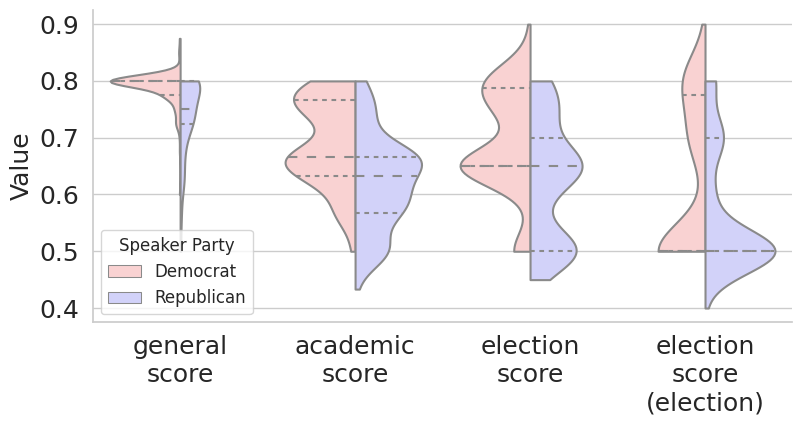

In [12]:
# violin plot of speaker party vs score
experiment_name = 'all_variables_150_slices_single_speaker_single_variable_candidates_only'
df_tmp = pd.read_pickle(f'{experiment_folder}/{experiment_name}.pkl')
# add averaged entries for each score
all_scores = []
new_columns = dict()
for column in df_tmp.columns:
    if 'score' not in column:
        continue
    all_scores.append(column)
    name = column.split(' (')[0]
    if name not in new_columns:
        new_columns[name] = []
    new_columns[name].append(column)
# add new
for name, columns in new_columns.items():
    df_tmp[name] = df_tmp[columns].mean(axis=1)
    print(f'Created {name} from {columns}')

scores = list(new_columns.keys()) + all_scores

# overwrite for final plot
scores = ['general score', 'academic score', 'election score', 'election score (election)']

df_tmp['Speaker Party'] = 'Unknown'
df_tmp.loc[df_tmp['speaker_party_IS_DEMOCRAT'] == 1, 'Speaker Party'] = 'Democrat'
df_tmp.loc[df_tmp['speaker_party_IS_REPUBLICAN'] == 1, 'Speaker Party'] = 'Republican'

df_tmp = df_tmp.melt(id_vars=['Speaker Party'], value_vars=scores)

# make it so that quart lines more visible, text bigger, and colors slightly transparent
# plt.rcParams.update({'font.size': 23})
# plt.rcParams.update({'patch.linewidth': 0.5})
light_red = (1, 0.8, 0.8)
light_blue = (0.8, 0.8, 1)

sns.set(style="whitegrid")
fig = sns.catplot(x='variable', y='value', hue='Speaker Party', kind="violin", data=df_tmp,
                height=4, aspect=2, split=True,
                cut=0,
                # normalize violin hue categories
                # common_norm=True,
                density_norm='area', legend=False,
                inner='quart', palette={'Democrat': light_red, 'Republican': light_blue})
                # inner='quart', palette={'Democrat': 'red', 'Republican': 'blue'})

# fig.set_xticklabels(rotation=15)
# remove x axis label
plt.xlabel('')
# x tick label sizes
plt.xticks(fontsize=18)
# y tick label sizes
plt.yticks(fontsize=18)
plt.ylabel('Value', fontsize=18)

# replace space with newline in x tick labels
labels = [label.get_text().replace(' ', '\n') for label in plt.gca().get_xticklabels()]
plt.gca().set_xticklabels(labels)

# put legend in bottom left
plt.legend(title='Speaker Party', loc='lower left', fontsize=12)

In [13]:
# example plot of speaker_party vs. rest correlation heatmap
import seaborn as snsimage
import matplotlib.pyplot as plt

data = pd.read_pickle(f'{experiment_folder}/all_variables_150_slices_single_speaker_single_variable_candidates_only.pkl')

# calculate the correlation matrix
data = data.drop(columns=['slice_id', 'speaker'])

corr = data.corr()

corr.dropna(axis=0, how='all', inplace=True)
corr.dropna(axis=1, how='all', inplace=True)

sub_corr = corr['speaker_party_IS_DEMOCRAT'].sort_values(ascending=False)

for key, value in sub_corr.items():
    print(f'{key:50} {value:.3f}')

speaker_party_IS_DEMOCRAT                          1.000
pro democratic (benefit)                           0.954
pro democratic (argument)                          0.832
empathy (empathy)                                  0.744
positive impact on poor population (impact)        0.726
positive impact on World (impact)                  0.639
positive impact on society (impact)                0.625
positive impact on politics (impact)               0.595
listening skills (listening skills)                0.570
outreach (relatability)                            0.556
civil discourse (civil discourse)                  0.549
positive impact on USA (impact)                    0.544
outreach (penetration)                             0.525
resonance (resonance)                              0.521
positive impact on environment (impact)            0.518
pro neutral (benefit)                              0.509
impact on society (impact)                         0.482
positive impact on audience (im

<Axes: >

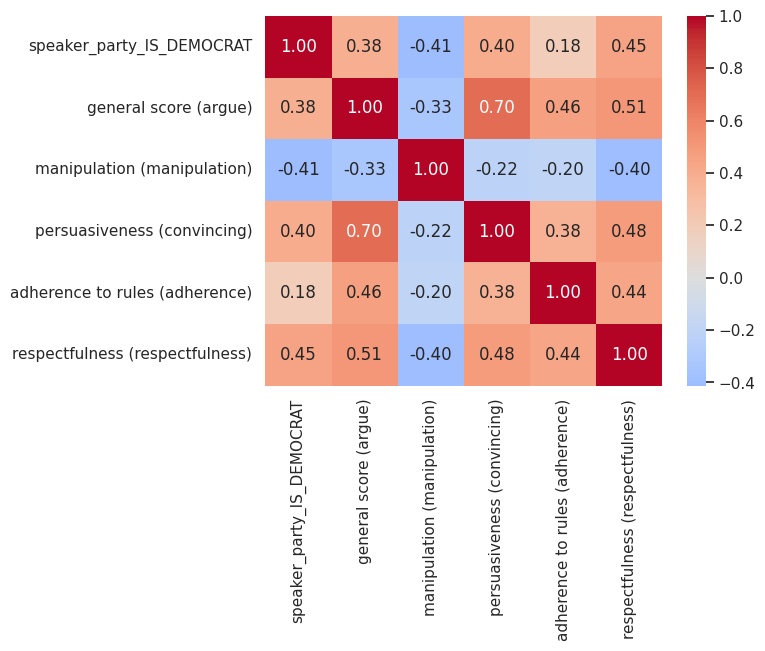

In [14]:
# plot the heatmap of a subset of the correlation matrix
columns = ['speaker_party_IS_DEMOCRAT', 'general score (argue)', 'manipulation (manipulation)', 'persuasiveness (convincing)', 'adherence to rules (adherence)', 'respectfulness (respectfulness)']

corr_sub = corr.loc[columns, columns]

# plt.figure(figsize=(10, 10))
sns.heatmap(corr_sub, annot=True, cmap='coolwarm', center=0, fmt='.2f')

In [24]:
import pingouin as pg

# create matrix where entry (i, j) is the partial correlation between i and j given all other variables
dp = data.copy()[corr.columns]

# for each name that starts the same, f.e. 'gneral score (argue)', ... Just average them together into 'general score'
new_columns = dict()
for column in dp.columns:
    if ' (' not in column:
        continue
    name = column.split(' (')[0]
    if name not in new_columns:
        new_columns[name] = []
    new_columns[name].append(column)
# add new and remove old
for name, columns in new_columns.items():
    dp[name] = dp[columns].mean(axis=1)
    dp.drop(columns=columns, inplace=True)

# print(dp.columns)
print(len(dp.columns))

new_corr = dp.corr()

cols = new_corr.columns

blacklist = [column for column in cols if 'impact' in column or 'score' in column]


available_columns = new_corr.loc[:, ['speaker_party_IS_DEMOCRAT', 'general score']].abs().max(axis=1).sort_values(ascending=False)
print(len(available_columns))
# remove > 0.8 and < 0.2
# available_columns = available_columns[(available_columns > 0.2) & (available_columns < 0.8)]
available_columns = available_columns[(available_columns < 0.8)]

print(len(available_columns))
available_columns = list(available_columns.index)
available_columns = [column for column in available_columns if column not in blacklist]
print(len(available_columns))

cols = ['speaker_party_IS_DEMOCRAT', 'general score'] + available_columns
cols = cols[:80]

cols = new_corr[cols].columns

print(len(cols))
print(cols)

pcm = pd.DataFrame(index=cols, columns=cols, dtype=float)

# use 2d tqdm
from tqdm import tqdm

for ii, jj in tqdm([(ii, jj) for ii in range(len(cols)) for jj in range(len(cols)) if ii <= jj]):
    i = cols[ii]
    j = cols[jj]
    if i == j:
        pcm[i][j] = 1
    else:
        # remove all that are too correlated
        conf_corr = new_corr.loc[cols, [i, j]].abs().max(axis=1)
        conf = list(cols[(conf_corr < 0.9)])
        assert(i not in conf)
        assert(j not in conf)
        assert(len(conf) > len(cols)//2)
        
        val = pg.partial_corr(data=dp, x=i, y=j, covar=conf)
        # print(val)
        pcm[i][j] = val['r'].values[0]
        pcm[j][i] = val['r'].values[0]

# pcm = pg.partial_corr(data=dp, x=dp.columns, y=dp.columns, covar=dp.columns)

# result = pg.partial_corr(data=data, x='A', y='B', covar=['C1', 'C2', ...])
# pcm

94
94
88
64
66
Index(['speaker_party_IS_DEMOCRAT', 'general score', 'outreach',
       'persuasiveness', 'empathy', 'authenticity', 'decorum',
       'tone is professional', 'resonance', 'preparation', 'logical',
       'clarity', 'egotistical', 'relevant', 'contextual awareness',
       'listening skills', 'civil discourse', 'coherence', 'respectfulness',
       'responsiveness', 'pro neutral', 'language appropriateness',
       'evasiveness', 'adherence to rules', 'factuality', 'contribution',
       'manipulation', 'completeness', 'respect for diverse opinions',
       'sensationalism', 'use of evidence', 'objectivity', 'interruptions',
       'consistency', 'conciseness', 'venue respect', 'accessibility',
       'innovation', 'relevance', 'fair play', 'time management',
       'speaker_num_parts', 'bias', 'truthfulness', 'tone is academic',
       'num_parts', 'content quality', 'speaker_num_parts_ratio', 'balance',
       'quality of sources', 'speaker_popular_votes_ratio', 'contr

100%|██████████| 2211/2211 [00:13<00:00, 166.35it/s]


In [25]:
import pandas as pd
import pingouin as pg
import networkx as nx
import statsmodels.api as sm
import matplotlib.pyplot as plt



from utils.network_utils import *



dis_matrix, _, _ = compute_distance_matrix_from_df(new_corr.loc[cols, cols])

/home/david/Desktop/LLM-Political-Study-Private/utils/network_utils.py:45: RuntimeWarning:

divide by zero encountered in scalar divide

/home/david/Desktop/LLM-Political-Study-Private/utils/network_utils.py:45: RuntimeWarning:

invalid value encountered in scalar divide

/home/david/Desktop/LLM-Political-Study-Private/.venv/lib/python3.11/site-packages/numpy/core/_methods.py:118: RuntimeWarning:

invalid value encountered in reduce



In [26]:
dis_matrix.columns

Index(['speaker_party_IS_DEMOCRAT', 'general score', 'outreach',
       'persuasiveness', 'empathy', 'authenticity', 'decorum',
       'tone is professional', 'resonance', 'preparation', 'logical',
       'clarity', 'egotistical', 'relevant', 'contextual awareness',
       'listening skills', 'civil discourse', 'coherence', 'respectfulness',
       'responsiveness', 'pro neutral', 'language appropriateness',
       'evasiveness', 'adherence to rules', 'factuality', 'contribution',
       'manipulation', 'completeness', 'respect for diverse opinions',
       'sensationalism', 'use of evidence', 'objectivity', 'interruptions',
       'consistency', 'conciseness', 'venue respect', 'accessibility',
       'innovation', 'relevance', 'fair play', 'time management',
       'speaker_num_parts', 'bias', 'truthfulness', 'tone is academic',
       'num_parts', 'content quality', 'speaker_num_parts_ratio', 'balance',
       'quality of sources', 'speaker_popular_votes_ratio', 'controversiality',
 

In [27]:
pcm.loc[:,'speaker_party_IS_DEMOCRAT'].sort_values(ascending=False)

speaker_party_IS_DEMOCRAT    1.000000
interruptions                0.998334
manipulation                 0.996233
egotistical                  0.983326
bias                         0.958437
                               ...   
respectfulness              -0.922743
emotional appeal            -0.926059
balance                     -0.962812
civil discourse             -0.971658
speaker_won_election        -0.986730
Name: speaker_party_IS_DEMOCRAT, Length: 66, dtype: float64

In [28]:
dm = DistanceMatrix(dis_matrix)
dm.keep_top_n_links(100)
dm.to_go_figure()

In [29]:
# cutoff = 0.00
# set all entries where abs is below cutoff to 0
# pcm = pcm.where(pcm.abs() < cutoff, 0)
# set all diagonal entries to 0
# pcm = pcm.where(~np.eye(pcm.shape[0], dtype=bool), 0)

# take direction from the dis matrix, but strength from the pcm
for i in range(pcm.shape[0]):
    for j in range(i):
        # # if they are both very small then set both to 0
        # if abs(pcm.iloc[i,j] - pcm.iloc[j,i]) < 0.01:
        #     pcm.iloc[i, j] = 0
        #     pcm.iloc[j, i] = 0
        #     continue

        if dis_matrix.iloc[i, j] > dis_matrix.iloc[j, i]:
            pcm.iloc[j, i] = 0
        else:
            pcm.iloc[i, j] = 0

# plot as dist matrix
#fig = dis_matrix_to_go_figure(pcm, 'Correlation Network', 100, source='speaker_party_IS_DEMOCRAT')
#fig
# set all diagonal entries to 0
pcm = pcm.where(~np.eye(pcm.shape[0], dtype=bool), 0)
dm = DistanceMatrix(pcm)
dm.keep_top_n_links(100)
dm.to_go_figure()



# # plot the graph of the partial correlation matrix
# import networkx as nx

# G = nx.from_pandas_adjacency(pcm)

# plt.figure(figsize=(15, 15))
# pos = nx.spring_layout(G)

# nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray', linewidths=1, font_color='black', alpha=0.7)
# plt.show()

In [30]:
source = set(['speaker_party_IS_DEMOCRAT'])
pcm_max_links = pd.DataFrame(0, index=pcm.index, columns=pcm.columns, dtype=float)


# keep all nodes reachable from speaker_party_IS_DEMOCRAT\
# pcm_reachable = pcm.copy()

# reachable = set()
# cutoff = 0.1
# n_steps = 1
# reachable.add('speaker_party_IS_DEMOCRAT')
# for i in range(n_steps):
#     for node in reachable.copy():
#         for other in pcm.columns:
#             if pcm.loc[node, other] > cutoff:
#                 reachable.add(other)
# reachable = list(reachable)
# pcm_reachable = pcm.loc[reachable, reachable]

# always add the strongest link connected to the source
n_links = 50
for i in range(n_links):
    # find the strongest link
    max_val = 0
    max_i = None
    max_j = None
    
    for i in source:
        for j in pcm_max_links.columns:
            if pcm_max_links.loc[i, j] > 0:
                continue
            if pcm.loc[i, j] > max_val:
                max_val = pcm.loc[i, j]
                max_i = i
                max_j = j
    
    if max_i is None:
        break
    if max_j not in source:
        source.add(max_j)
    
    pcm_max_links.loc[max_i, max_j] = max_val


# plot as dist matrix
# set all diagonal entries to 0
for i in range(pcm_max_links.shape[0]):
    pcm_max_links.iloc[i, i] = 0
dm = DistanceMatrix(pcm_max_links)
fig = dm.to_go_figure()
fig
#fig = dis_matrix_to_go_figure(pcm_max_links, 'Correlation Network', 100, source='speaker_party_IS_DEMOCRAT')
#fig

In [22]:
import pandas as pd
import pingouin as pg
import networkx as nx
import statsmodels.api as sm
import matplotlib.pyplot as plt



from utils.network_utils import *


# remove all with 'impact' in the name
# remove all with 'score' in the name
blacklist = [column for column in new_corr.columns if 'impact' in column or 'score' in column]



# fixed = ['speaker_party_IS_DEMOCRAT', 'general score (argue)']
# available_columns = [column for column in corr.columns if column not in fixed]
# available_columns = new_corr.loc[:, ['speaker_party_IS_DEMOCRAT', 'general score (argue)']].abs().max(axis=1).sort_values(ascending=False)
available_columns = new_corr.loc[:, ['speaker_party_IS_DEMOCRAT', 'general score']].abs().max(axis=1).sort_values(ascending=False)
print(len(available_columns))
# remove > 0.8 and < 0.2
available_columns = available_columns[(available_columns > 0.2) & (available_columns < 0.8)]
print(len(available_columns))
available_columns = list(available_columns.index)
available_columns = [column for column in available_columns if column not in blacklist]
print(len(available_columns))

# columns = ['speaker_party_IS_DEMOCRAT', 'general score (argue)'] + available_columns
columns = ['speaker_party_IS_DEMOCRAT', 'general score'] + available_columns

# make first entry the one most correlated to the fixed
# columns = [corr.loc[available_columns, fixed].abs().mean(axis=1).sort_values(ascending=False).index[0]]
# columns = ['speaker_party_IS_DEMOCRAT', 'general score (argue)', 'manipulation (manipulation)']


# n_columns = 20
# while len(columns) < n_columns:
#     # random choice
#     available_columns = [column for column in available_columns if column not in columns]
#     columns += [random.choice(available_columns)]


# # add columns with lowest correlation to the rest
# while len(columns) < n_columns:
#     # find the column with the lowest correlation to the rest
#     available_columns = [column for column in available_columns if column not in columns]
#     sub_corr = corr.loc[available_columns, columns].abs().mean(axis=1).sort_values(ascending=True)
#     # get first that is not in columns or fixed
#     columns += [sub_corr.index[0]]

print(columns)

corr_sub = new_corr.loc[columns, columns]
dis_matrix, _, _ = compute_distance_matrix_from_df(corr_sub)

94
74
52
['speaker_party_IS_DEMOCRAT', 'general score', 'outreach', 'persuasiveness', 'empathy', 'authenticity', 'decorum', 'tone is professional', 'resonance', 'preparation', 'logical', 'clarity', 'egotistical', 'relevant', 'contextual awareness', 'listening skills', 'civil discourse', 'coherence', 'respectfulness', 'responsiveness', 'pro neutral', 'language appropriateness', 'evasiveness', 'adherence to rules', 'factuality', 'contribution', 'manipulation', 'completeness', 'respect for diverse opinions', 'sensationalism', 'use of evidence', 'objectivity', 'interruptions', 'consistency', 'conciseness', 'venue respect', 'accessibility', 'innovation', 'relevance', 'fair play', 'time management', 'speaker_num_parts', 'bias', 'truthfulness', 'tone is academic', 'num_parts', 'content quality', 'speaker_num_parts_ratio', 'balance', 'quality of sources', 'speaker_popular_votes_ratio', 'controversiality', 'confidence', 'engagement']


In [1]:
# fig = dis_matrix_to_go_figure(dis_matrix, 'Correlation Network', 50, source='speaker_party_IS_DEMOCRAT')
# fig